# waves

In [26]:
#import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time
import matplotlib.colors as colors
import random
import pandas as pd

**main variables**
<br> f - main frequency (Hz)
<br> full_f - the entire time-frequency function (Hz) ("x" as x axis)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)
<br> amp - amplitude of signal
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.
<br> Or import one in.

In [106]:
#%%script false
f=40
#t=4
samples=4200 #random.randint(400,50000)
s_rate=1000
t=samples/s_rate
randamp=1
nyquist=samples/2/t
frangemax=60#nyquist

xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
x = np.linspace(0.0, t, samples)
full_f=(f-70/(x+2.1))*0.4  #np.linspace(f, f, samples) #   f/2+np.sin(2*np.pi*x)   f+x*0.01        
full_f_phase = np.zeros(samples)
for i in range (samples):
    full_f_phase[i]=np.sum(full_f[:i])/500
    
amp=1#0.4+x/t*0.6

s_det = amp*np.sin(full_f_phase*np.pi) #Changing freqency. old way: *(1+(x*10**2)**0.5)
s_noise = (np.random.rand(samples)-0.5)*randamp
s=(s_det+s_noise)/(0.5*randamp+1)
print (samples)
print (samples)
#f1=f; f2=f/np.sqrt(2); s=np.sin(f1*2*np.pi*x)+np.sin(f2*2*np.pi*x)

4200
4200


In [109]:
#%%script false
sav1 = io.readsav('C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\AUGD_28881_Loaded-with-MTR.sav', python_dict = True)
print(sav1)
s=np.array(sav1['data'])
x=np.array(sav1['timeax'])
#print(cpc_sav_dic1)
#print('\n\n',x)
#C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\AUGD_34924_2208_2238_Loaded-with-MTR.sav - nullközepű SXR
#AUGD_34924_J051_240_245_Loaded-with-MTR.sav - nem nullközepű tán ECE?
#AUGD_28881_Loaded-with-MTR.sav
#C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\AUGD_34924_2208_2238_Loaded-with-MTR.sav

{'expname': b'AUGD', 'shotnumber': 28881, 'channels': array([b'MHA-B31-14'], dtype=object), 'data': array([-0.4974127 , -0.39484704, -0.27176982, ...,  0.00515192,
        0.33336052, -0.08715799], dtype=float32), 'timeax': array([0.62     , 0.6200005, 0.620001 , ..., 0.679999 , 0.6799995,
       0.68     ]), 'theta': array([6.14334226]), 'phi': array([3.5964979]), 'data_history': b'Loaded-with-MTR', 'coord_history': b'Geometrical_Loaded-with-MTR'}


In [169]:
#%%script false
f=0
s = s.astype(float)
x = x.astype(float)
samples=s.size
full_f = np.zeros(samples)
t=max(x)-min(x)
nyquist=samples/2/t
frangemax=nyquist#250000#
xf=np.linspace(0.0, frangemax, frangemax*t+1)
s_rate=x.size/t
print(nyquist)

1000008.3333333343


C:\Users\win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

In [170]:
#%%script false
usewidgets=1
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=0

FloatSlider(value=0.0)

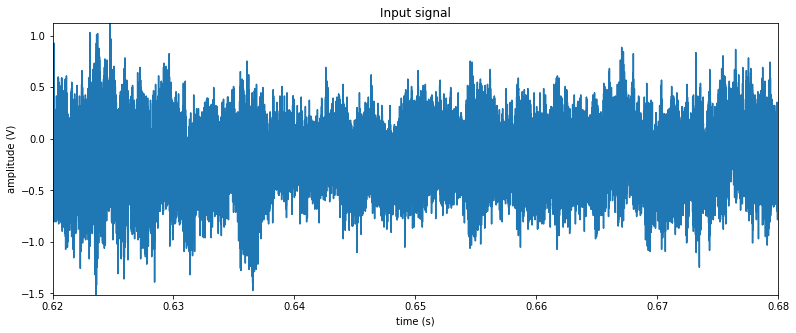

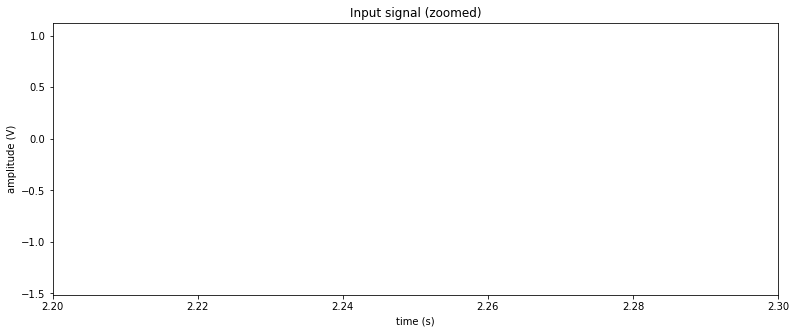

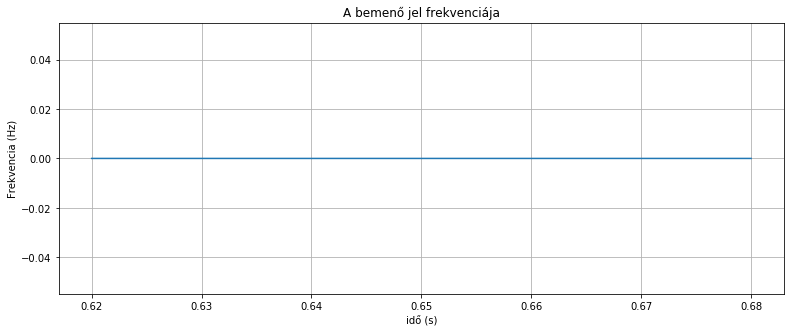

0.0


In [171]:
#%%script false
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
plt.axis([min(x),max(x)-(max(x)-min(x))*view.value/100.6,min(s),max(s)])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

plt.figure(figsize=(13,5))
plt.title('Input signal (zoomed)')
plt.plot(x,s)
#yaxismax=1/2**(view.value/12)
plt.axis([2.20,2.3,min(s),max(s)])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
#plt.show()

plt.figure(figsize=(13,5))
plt.title("A bemenő jel frekvenciája")
plt.plot(x,full_f)
#yaxismax=1/2**(view.value/12)
#plt.xlim(-0.01,t/(1.05**view.value))
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')
plt.grid(True)
#plt.savefig('freq_in.pdf')
plt.show()

print(full_f[-1]*t)

## Fourier transform and examining it
<br>Now we take the Fourier-transform of the signal abowe, what has been already calculated, and make 3 plots:
 - One displaying the Real and imaginery parts of the vectors generated by Fourier at the corresponding frequencies
 - Next displaying their absolute values - we wil use these absolute values in the future
 - And one displaying the rotation of these vectors on the imaginary plane

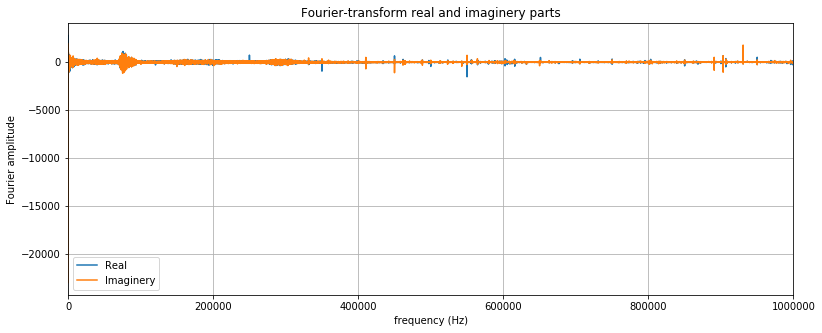

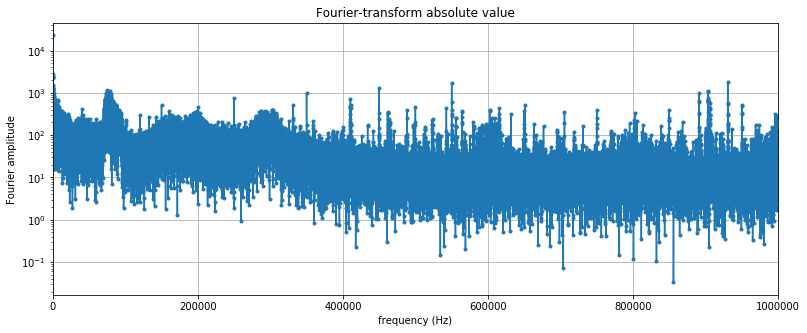

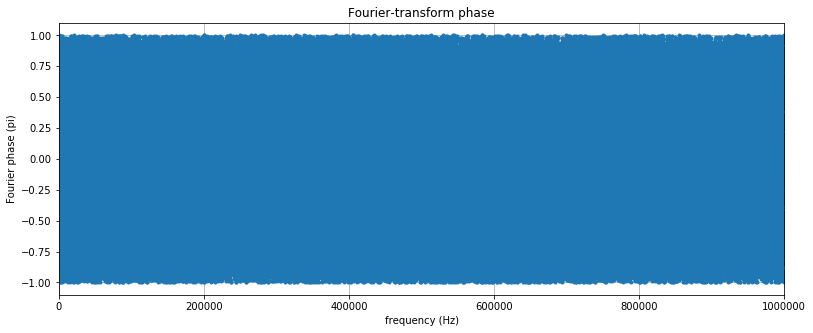

In [172]:
#%%script false
yf = scipy.fftpack.fft(s)
yfabs=np.abs(yf[:xf.size])
yfang=np.angle(yf[:xf.size])
yfimag=np.imag(yf[:xf.size])
yfreal=np.real(yf[:xf.size])
#yfabs=(np.abs(yf[:frangemax])*np.abs(yfimag)*np.abs(yfreal))

plt.figure(figsize=(13,5))
plt.plot(xf,yfimag,xf,yfreal)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier amplitude')
plt.title('Fourier-transform real and imaginery parts')
plt.grid(True)
plt.legend(('Real', 'Imaginery'))
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier amplitude')
#plt.xscale('log')
plt.yscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

yfang=yfang/np.pi
plt.figure(figsize=(13,5))
plt.plot(xf,yfang,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)') 
plt.ylabel("Fourier phase (pi)")
#plt.xscale('log')
plt.title('Fourier-transform phase')
plt.grid(True)
plt.show()

#print(yfang[f*int(t)+1])
#print(yfang[f*int(t)])
#print(yfang[f*int(t)-1])

Now, we will seek the peaks of the 2nd graph: we will search for the most likely original frequencies. We will find the 5 biggest values, and display their Fourier (absolute) values.

In [173]:
%%script false
#print (np.average(np.abs(yf)))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    #yfmaxsum=yfmaxsum+yfsort[-i-1]
    for j in range(xf.size):
        if yfsort[-i-1] == yfabs[j]:
            fout[i]=j/t
    #print (fout[i],"  ",yfabs[fout[i]])
#print (np.max(np.abs(yf)))

d = {'Frequency (Hz)': [fout[0],fout[1],fout[2],fout[3],fout[4]], 
     'Fourier amplitude': [yfabs[int(fout[0]*t)],yfabs[int(fout[1]*t)],yfabs[int(fout[2]*t)],yfabs[int(fout[3]*t)],yfabs[int(fout[4]*t)]]}
df = pd.DataFrame(data=d)
display (df)

deviation=np.std(yfabs)
certainity=yfabs[int(fout[0]*t)]/deviation

yfsum=np.sum(yfabs*yfabs)
certainity2=yfabs[int(fout[0]*t)]*yfabs[int(fout[0]*t)]/yfsum


if fout[0]==f:
    print ('We have succesfully found our original frequency:', f ,'Hz')
#    print ('\nConfidence using square sum:', 100*certainity2, '%')
#    print ('Confidence using standard deviation:', certainity)
else:
    print ("We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.")

Couldn't find program: 'false'


Now, we will F-transform the deterministic and stohastic component of our signal separatly, and compare them.

In [174]:
%%script false
yf_det=scipy.fftpack.fft(s_det)
yf_det_abs=np.abs(yf_det[:xf.size])
yf_noise=scipy.fftpack.fft(s_noise)
yf_noise_abs=np.abs(yf_noise[:xf.size])

plt.figure(figsize=(13,5))
plt.plot(xf,yf_det_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
#plt.xscale('log')
plt.title('Fourier-transform absolute value of deterministic signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yf_noise_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
plt.title('Fourier-transform absolute value non-deterministic signal')
plt.grid(True)
plt.show()

Couldn't find program: 'false'


## Short-time Fourier transform

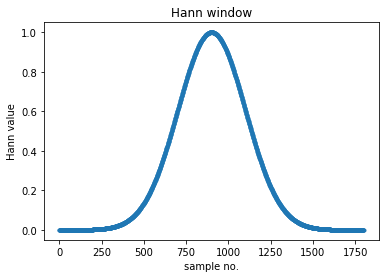

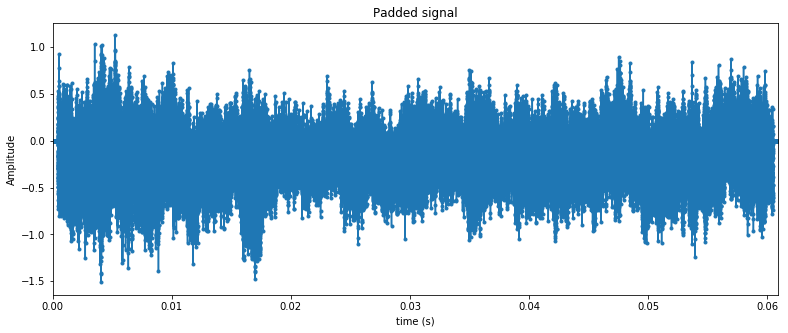

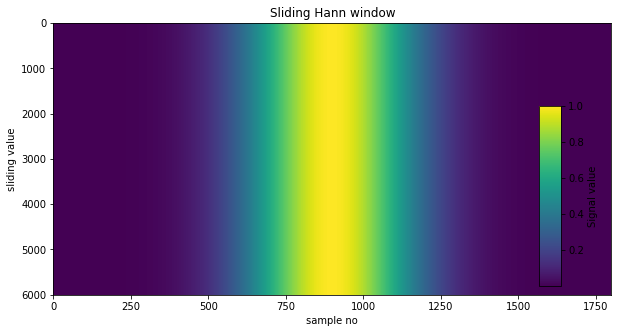

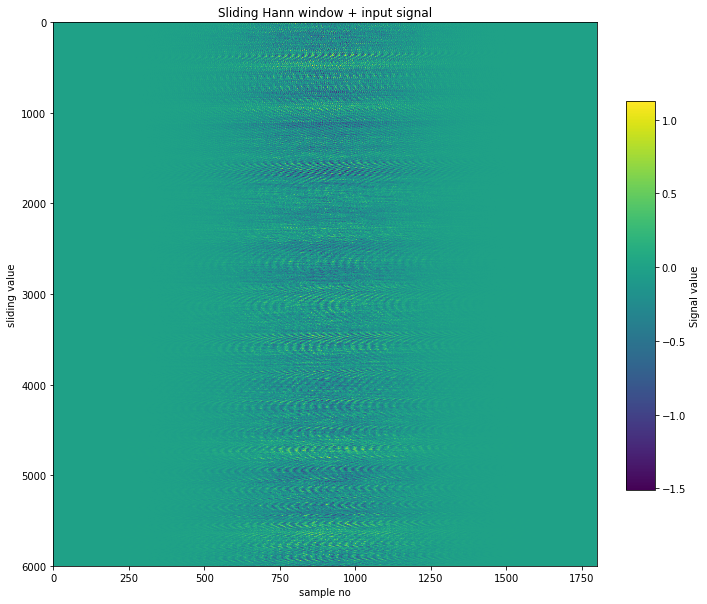

In [215]:
t0=time.time()
hann_r = 900
d_win=20#random.randint(200,300)
std=200
win_base = scipy.signal.gaussian(2*hann_r+1, std=std)#np.hanning(2*hann_r+1)

plt.plot(win_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
plt.show()

z_padded_s = np.zeros (samples+2*hann_r)
z_0=z_padded_s
z_padded_s[hann_r:-hann_r] = s
x_hann=np.linspace(0.0, t+(2*hann_r/s_rate), samples+2*hann_r)

plt.figure(figsize=(13,5))
plt.plot(x_hann,z_padded_s,".-")
plt.xlim((0,max(x_hann)))
plt.title('Padded signal')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()

win = np.zeros((int(samples/d_win+1), 2*hann_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

z_win = np.zeros((int(samples/d_win+0.9), hann_r*2+1))
for i in range(int(samples/d_win+0.9)):
    z_win[i] = win[i] * z_padded_s [d_win*i:d_win*i+hann_r+hann_r+1]

plt.figure(figsize=(10,10))
plt.imshow(z_win,aspect='auto')
plt.title('Sliding Hann window + input signal')
plt.xlabel('sample no')
plt.ylabel('sliding value')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.92, 0.23, 0.04, 0.54])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), hann_r*2+1))
for i in range(int(samples/d_win+0.9)):
    z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  
t1=time.time()

In [216]:
%%script false
t2=time.time()
f_ax_stft, t_ax_stft, z_spy_stft = scipy.signal.stft(s,s_rate,window=win_base, nperseg=hann_r*2+1, noverlap =hann_r*2+1-d_win)
t3=time.time()
print(t1-t0)
print(t3-t2)

85.20222616195679
1.4554390907287598


In [217]:
%%script false
z_spy_stft=np.abs(z_spy_stft)**2
z_spy_stft_cutted = np.zeros((int(frangemax*(2*hann_r+1)/s_rate),int(samples/d_win)))#int(frangemax*t+0.01)
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*hann_r+1)/s_rate)):
        z_spy_stft_cutted [j][i] = z_spy_stft [j][i]

In [218]:
z_win_fft_cutted = np.zeros((int(frangemax*(2*hann_r+1)/s_rate), int(samples/d_win)))
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*hann_r+1)/s_rate)): #int(frangemax*max(x_hann))
        z_win_fft_cutted [j][i] = z_win_fft [i][j]**2

print(z_spy_stft.shape)
print(z_spy_stft_cutted.shape)
print(z_win_fft.shape)
print(z_win_fft_cutted.shape)
print(z_win_fft.max()/abs(z_spy_stft.max()))

(901, 6001)
(900, 6000)
(6000, 1801)
(900, 6000)
1053.7947880302156


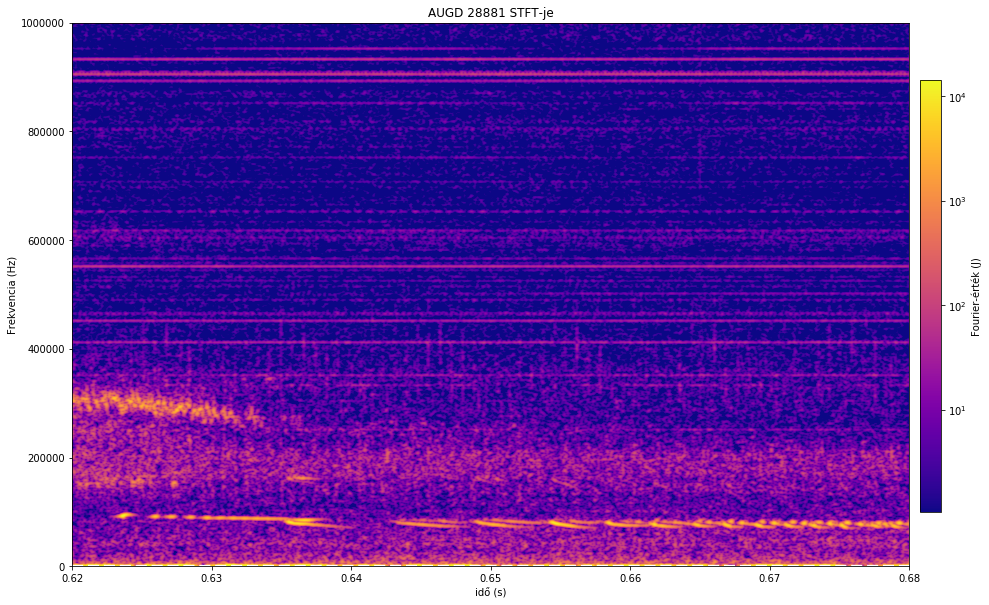

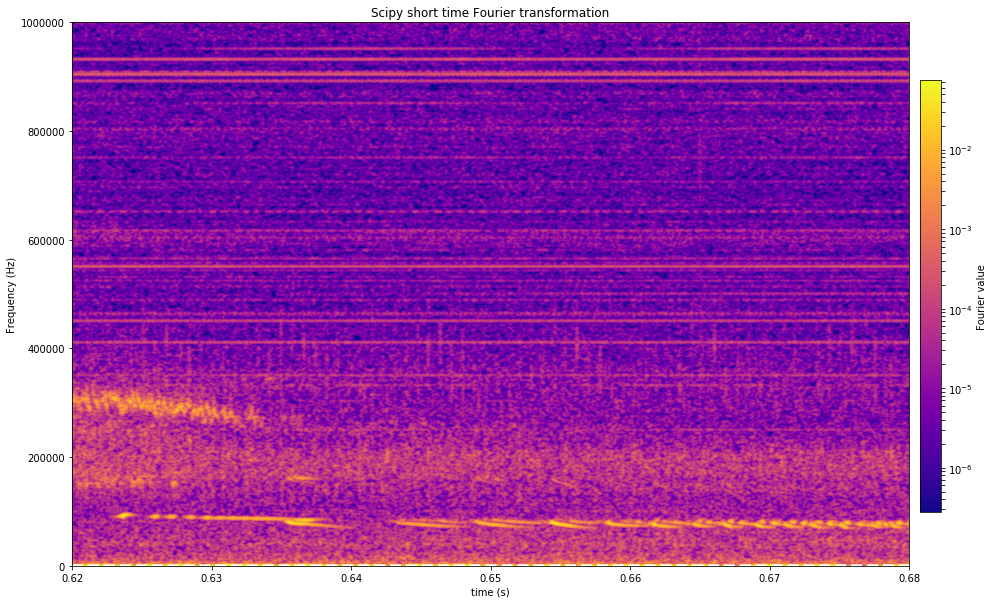

0.22631947861171223


In [228]:
##### %%script false
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(15,10))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
ax.plot(x,np.abs(full_f),color='w',linewidth=3,linestyle='dashed')#img = ax.
img = plt.imshow(z_win_fft_cutted,cmap='plasma', interpolation='gaussian', aspect='auto', extent=[min(x),max(x),frangemax,0], norm=colors.LogNorm(vmin=z_win_fft_cutted.min()*30000000, vmax=z_win_fft_cutted.max()/4))#
#plt.title('My Short-time Fourier transform')
plt.title('AUGD 28881 STFT-je')
plt.ylabel('Frekvencia (Hz)')
plt.xlabel('idő (s)')#('time (s)')
#plt.xlim(0.652,0.66)
#plt.ylim(100000,40000)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]))
cbar.set_label('Fourier-érték (J)')
#plt.axis([2.13,2.15,min(s),20000])
cbar.set_ticks(logax)
plt.savefig('plot1.pdf')
plt.show()


logax = np.linspace(int(np.log10(z_spy_stft_cutted.min())),int(np.log10(z_spy_stft_cutted.max())),int(np.log10(z_spy_stft_cutted.max()))-int(np.log10(z_spy_stft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(15,10))
#plt.figure(figsize=(15,10))
#plt.pcolormesh(f_ax, t_ax, np.abs(z_spy_stft), vmin=0, vmax=amp) # extent=[min(x),max(x),frangemax,0],
ax.plot(x,np.abs(full_f),color='w',linewidth=3,linestyle='dashed')
plt.title('Scipy short time Fourier transformation')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time (s)')
plt.subplots_adjust(right=0.90)
img2 = ax.imshow(np.abs(z_spy_stft_cutted),cmap='plasma', interpolation='gaussian', aspect='auto',extent=[min(x),max(x),frangemax,0], norm=colors.LogNorm(vmin=z_spy_stft_cutted.min()*2000000, vmax=z_spy_stft_cutted.max()/3))#)*4000000/800
plt.gca().invert_yaxis() #extent=[min(x),max(x),frangemax,0],
cbar=plt.colorbar(img2,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier value')
#cbar.set_ticks(logax)
#plt.savefig('plot2.pdf')
plt.show()

print(np.max(z_spy_stft))

6000.05
(901, 6001)
901


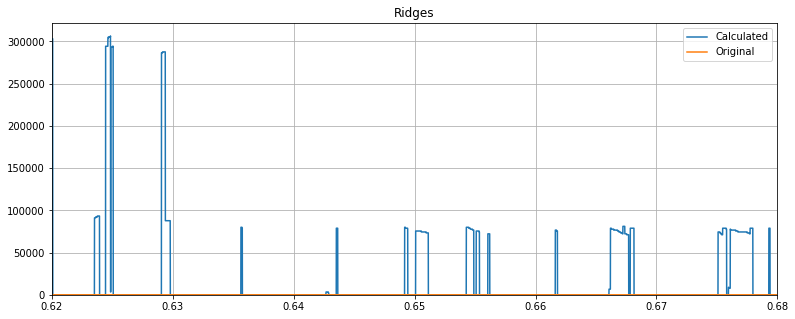

In [230]:
#%%script false
#ridge_no = 1
print(samples/d_win)
print(z_spy_stft.shape)
print(int(nyquist*(2*hann_r+1)/s_rate+0.9))
ridge_r=100
ridge = np.zeros(int(samples/d_win+0.9))

for i in range(int(samples/d_win+0.9)):
    ridgeval=0  #max(z_spy_stft[i][:])
    for j in range(int(nyquist*(2*hann_r+1)/s_rate-0.9)):
        if ridgeval < z_spy_stft[j][i]:
            ridgeval=z_spy_stft[j][i]
            ridge[i]= j
    #print (i,"  ",ridge[i],"\t", ridgeval,"\t", z_spy_stft[i][int(ridge[i])])

ridge=ridge*(s_rate/(2*hann_r+1))

#proc_x=np.linspace(min(x),max(x),np.size(ridge))

#ez a maximumérték! Nem a maximumhely!
plt.figure(figsize=(13,5))
plt.title('Ridges')
plt.plot(np.linspace(min(x),max(x),np.size(ridge)),ridge,x,full_f)
plt.grid(True)
plt.legend(('Calculated', 'Original'))
#yaxismax=1/2**(view.value/12)
plt.axis([min(x),max(x),min(ridge),max(ridge)*1.05])
#plt.ylabel('Frequency (Hz)')
#plt.xlabel('time (s)')
plt.show()

## Small observations
Now, we make histograms of the noise and the entire signal. The difference - if the input is a single frequency - only one point. In general: it is the signal. We will fit a half gaussian onto these, and see, how likely it is, that the difference (signal) is produced by the noise.

In [181]:
%%script false
hist_bins = np.linspace(0, 50000, 50)

"""plt.figure(figsize=(13,5))
plt.hist(yf_noise,hist_bins, density=True)
plt.title('Distribution of Fourier transformation (non-deterministic component)')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()"""

plt.figure(figsize=(13,5))
plt.hist(yfabs, hist_bins, density=True)
plt.title('Distribution of entire Fourier transformation')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.yscale('log')
plt.grid(True)
plt.show()

Couldn't find program: 'false'


In [182]:
%%script false
plt.figure(figsize=(13,5))
plt.acorr(yfabs, maxlags=1400)
plt.axis([-1,1400,0,1])
#plt.xlim((0,frangemax))
plt.xlabel('$\Delta$ frequency (Hz)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of fourier value')
plt.grid(True)
plt.show()

def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

s_acf=acf(s)
s_acf=s_acf/np.max(s_acf)
s_acf_fft_abs=abs(scipy.fftpack.fft(s))
s_acf_fft_ang=np.angle(scipy.fftpack.fft(s))/np.pi

plt.figure(figsize=(13,5))
plt.plot(x,s_acf)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim(min(x),max(x))
plt.xlabel('$\Delta$t (s)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of input signal')
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_abs[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's amplitude")
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,s_acf_fft_ang[:xf.size])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's phase")
plt.grid(True)
#plt.show()

Couldn't find program: 'false'


We can see, that the ratio of the values of the Fourier transform of the deterministic and non-deterministic components of the input signal is practically a constant, and it is influenced by the relative amplitude of these components in the original signal. Is this a coincidence? [drawing](https://i.redd.it/nnlrafulz5701.jpg)

In [183]:
%%script false
det_noise_fft_ratios = yfabs/np.abs(yf_noise[:xf.size]+yf_det[:xf.size])
print("Ratio of the ffts of deterministic and non-deterministic components:",'\naverage:',np.average(det_noise_fft_ratios))
print('Standard deviation:',np.std(det_noise_fft_ratios))
if 0<np.std(det_noise_fft_ratios)<0.001 :
    print("The deviation is practically zero.")

Couldn't find program: 'false'


The next cell is used to evaluate how fast our stft is. If we got enough data (what we have) we can plot it.

In [184]:
%%script false
file = open("out.txt","a")
for q in range(10000):
    f=40
    #t=4
    samples=37100+25*q+random.randint(0,24)
    s_rate=1000
    t=samples/s_rate
    randamp=5
    nyquist=samples/2/t
    frangemax=60#nyquist

    xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
    x = np.linspace(0.0, t, samples)
    full_f=np.linspace(f, f, samples) #   f/2+np.sin(2*np.pi*x)   f+x*0.01        (f-65/(x+1.1))
    full_f_phase = np.zeros(samples)
    for i in range (samples):
        full_f_phase[i]=np.sum(full_f[:i])/500
    
    amp=1#0.4+x/t*0.6

    s_det = amp*np.sin(full_f_phase*np.pi) #Changing freqency. old way: *(1+(x*10**2)**0.5)
    s_noise = (np.random.rand(samples)-0.5)*randamp
    s=(s_det+s_noise)/(0.5*randamp+1)
       
    t0=time.time()
    hann_r = 120#5*q+3758+random.randint(0,4)#
    d_win=30#random.randint(200,300)
    hann_base = np.hanning(2*hann_r+1)

    z_padded_s = np.linspace (0, 0, samples+2*hann_r+1)
    z_0=z_padded_s
    z_padded_s[hann_r:-hann_r-1] = s
    x_hann=np.linspace(0.0, t+(2*hann_r/s_rate), samples+2*hann_r)

    win = np.zeros((int(samples/d_win+1), 2*hann_r+1))
    for i in range(int(samples/d_win+1)):
        win [i]=hann_base
    
    #print(str(hann_r*2+1)+"\t"+str(win.shape))
    
    z_win = np.zeros((int(samples/d_win+1), hann_r*2+1))
    for i in range(int(samples/d_win+1)):
        z_win[i] = win[i] * z_padded_s [d_win*i:d_win*i+hann_r+hann_r+1]

    z_win_fft = np.zeros((int(samples/d_win+1), hann_r*2+1))
    for i in range(int(samples/d_win+1)):
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  

    t1=time.time()
    
    t2=time.time()
    hann_big=np.zeros(samples)
    for i in range(2*hann_r):
        hann_big[int(samples/2-hann_r+i)] = hann_base[i]

    f_ax_stft, t_ax_stft, z_spy_stft = scipy.signal.stft(s,1000,window=hann_big, nperseg=samples, noverlap =samples-d_win)
    t3=time.time()
    
    if t1>t0 and t3>t2:
        file.write(str(t1-t0)+"\t"+str(t3-t2)+"\t"+str(samples)+"\t"+str((t1-t0)/(t3-t2))+"\n")
        print(str(q)+"\t"+ str(t1-t0)+"\t"+str(t3-t2)+"\t"+str(samples)+"\t"+str((t1-t0)/(t3-t2)))
file.close()

Couldn't find program: 'false'


In [185]:
file.close()

NameError: name 'file' is not defined

In [ ]:
dsamples = pd.read_excel("stft_speed.xlsx", 0)
dHann_r = pd.read_excel("stft_speed.xlsx", 1)
dd_win = pd.read_excel("stft_speed.xlsx", 2)
dsignaltype = pd.read_excel("stft_speed.xlsx", 3)
print (dsamples.tail())
print (dHann_r.head())
print (dd_win.head())
print (dsignaltype.shape)

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(dsamples.samples,dsamples.ratio,s=1)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel('samples')
plt.ylabel('My/Scipy speed ratio')
plt.title('Speed ratios of the STFTs when changing sample size')
#plt.xlim(0,7000)
plt.show()

plt.figure(figsize=(13,10))
plt.plot(dHann_r.hann_r,dHann_r.ratio,'.')
plt.grid()
plt.yscale("log")
plt.xlabel('hann_r')
plt.ylabel('My/Scipy speed ratio')
plt.title('Speed ratios of the STFTs when changing window size')
plt.xlim(0,6000)
plt.show()

plt.figure(figsize=(13,10))
plt.plot(dd_win.d_win,dd_win.ratio,'.')
plt.grid()
#plt.yscale("log")
plt.xlabel('d_win')
plt.ylabel('My/Scipy speed ratio')
plt.title('Speed ratios of the STFTs when changing window distance')
plt.xlim(0,300)
plt.show()

plt.figure(figsize=(13,10))
plt.plot(dsignaltype.samples2,dsignaltype.ratio2,'.')
plt.grid()
plt.yscale("log")
plt.xlabel('samples')
plt.ylabel('My/Scipy speed ratio')
plt.title('Speed ratios of the STFTs when changing signal type')
plt.xlim(0,6000)
plt.show()

## Tasks
<br> 
<br> Import and evaluate chirps
<br> Reconstruct wave frequencies and amplitudes
<br> Get the radial ?function of several wave types

In [ ]:
f=1
i=1
n=2000

for i in range(n):
    f=f*(i+1)
    print(f)